<a href="https://colab.research.google.com/github/Higgins2718/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
import pandas as pd
import numpy as np


data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

df_raw = pd.read_csv(data_url)

In [10]:
# Checking for NaNs
df_raw.isnull().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [11]:
df_raw.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [0]:
# Giving the columns understandable names
df=df_raw.rename(columns = {'30':'patient_age', '64':'operation_year', '1':'positive_axillary_nodes', '1.1':'survival_status'})

In [0]:
# Re-encoding survival_status to be 1/0 vs 1/2
df['survival_status'] = np.where(df['survival_status'] == 1, 1, df['survival_status'])
df['survival_status'] = np.where(df['survival_status'] == 2, 0, df['survival_status'])


In [14]:
# Confirming that all went as planned
df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [15]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
# TODO
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [56]:
# Age is going to have to be binned here!
node_bins = pd.cut(df['positive_axillary_nodes'], 5)  # 5 equal-sized bins

# Features are easier to visualize in this order vs their converse 
nodes_survival_crosstab_view = pd.crosstab(df['survival_status'], node_bins)
nodes_survival_crosstab_view

positive_axillary_nodes,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
survival_status,,,,,
0,58,15,6,1,1
1,207,11,5,0,1


In [57]:
# Age is going to have to be binned here!
age_bins = pd.cut(df['patient_age'], 5)  # 5 equal-sized bins

# Features are easier to visualize in this order vs their converse 
age_survival_crosstab_view = pd.crosstab(df['survival_status'], age_bins)
age_survival_crosstab_view

patient_age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
survival_status,,,,,
0,4,31,27,16,3
1,38,68,69,43,6


In [18]:
# A more detailed and comprehensive look inside our dataframe
df.describe()

,patient_age,operation_year,positive_axillary_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.734426
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


### Time to get some real insights into this data!


(array([15., 27., 46., 53., 55., 41., 41., 18.,  7.,  2.]),
 array([30. , 35.3, 40.6, 45.9, 51.2, 56.5, 61.8, 67.1, 72.4, 77.7, 83. ]),
 <a list of 10 Patch objects>)

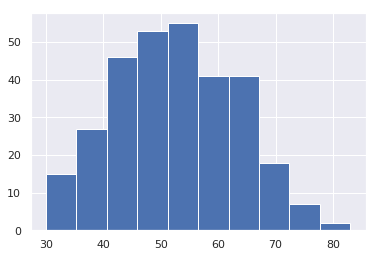

In [68]:
### I'm trying to get a sense of the age distribution in this dataset
plt.hist(df['patient_age']);

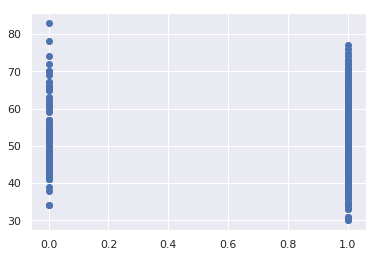

In [19]:

### Is there a relationship between age and survival status?

plt.scatter(df['survival_status'], df['patient_age'])

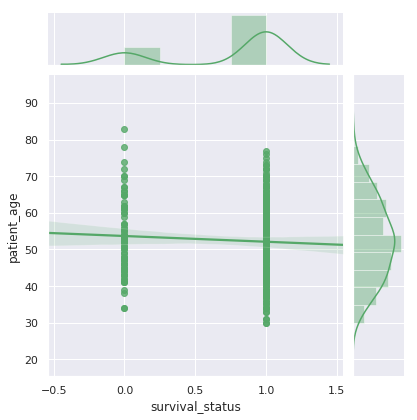

In [29]:
### Younger patients appear to be more likely to survive, 
### but there is little data for older patients and we have a rather high p-value of 0.26
plot = sns.jointplot(data=df, x='survival_status', y='patient_age', kind='reg', color='g');

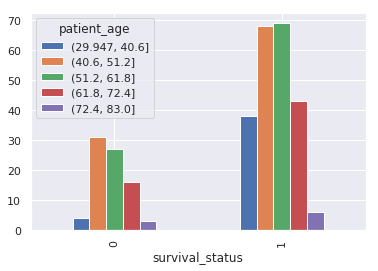

In [63]:
age_survival_crosstab_view.plot(kind='bar');

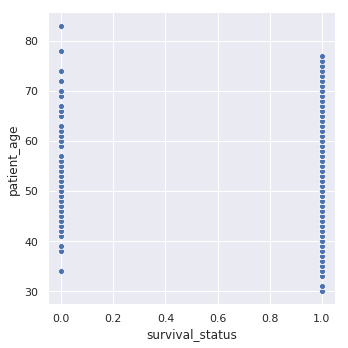

In [24]:
sns.relplot(x="survival_status", y="patient_age", data=df);


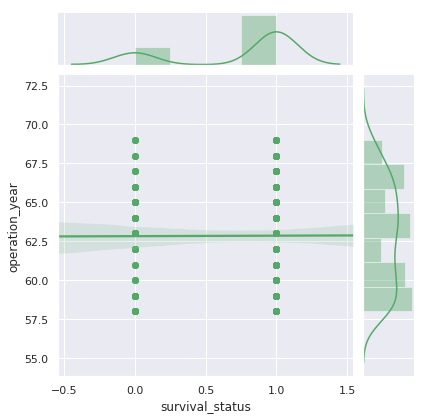

In [34]:
### What about survival_status and the operation year — new medical techniques?
import seaborn as sns
sns.set(style="darkgrid")

### Not so useful. All we see is that more people have survived than have died as a consequence of this cancer. 
### There is no obvious upward trend over time.

plot = sns.jointplot(data=df, x='survival_status', y='operation_year', kind='reg', color='g')

A pairplot provides no additional insights

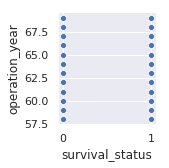

In [35]:
sns.pairplot(data=df, x_vars='survival_status', y_vars='operation_year');

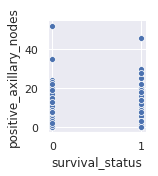

In [36]:
### Is there a relationship between the number of positive axillary nodes and survival status?
### The data show that there is, and this is intuitive. A patient is less likely to survive if they have more positive axillary nodes. 

plot = sns.pairplot(data=df, x_vars='survival_status', y_vars='positive_axillary_nodes');


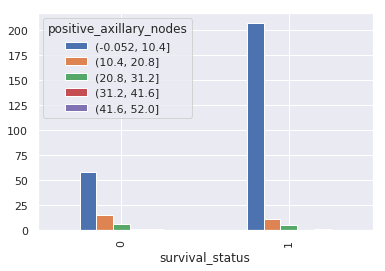

In [59]:
### Here is a far better look at the relationship between survival status and number of nodes
nodes_survival_crosstab_view.plot(kind='bar')

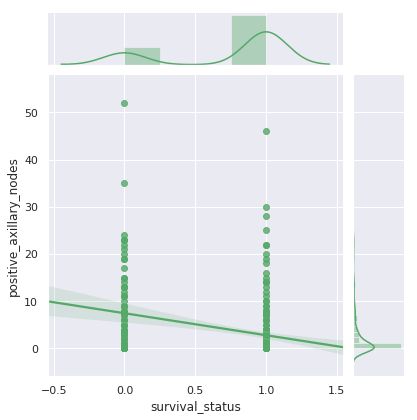

In [65]:
### I found this plot to be the most intuitive.

survival_nodes_plot = sns.jointplot(data=df, x='survival_status', y='positive_axillary_nodes', kind='reg', color='g')

Text(0.5, 0, 'patient_age')

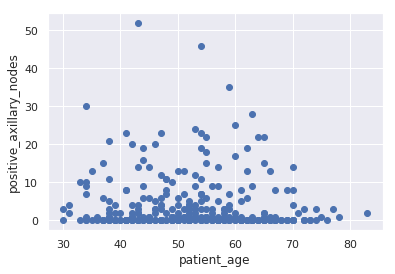

In [66]:
plt.scatter(df['patient_age'], df['positive_axillary_nodes'])
plt.ylabel("positive_axillary_nodes")
plt.xlabel("patient_age")


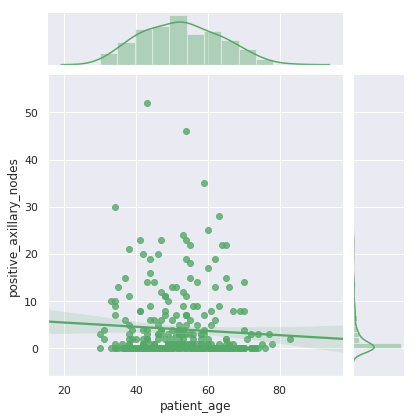

In [40]:
plot = sns.jointplot(data=df, x='patient_age', y='positive_axillary_nodes', kind='reg', color='g');

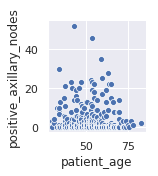

In [42]:
plot = sns.pairplot(data=df, x_vars='patient_age', y_vars='positive_axillary_nodes');


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

- What is at least one feature that looks to have a negative relationship with survival?

- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.


# Younger patients were more likely to survive, particularly if they were between the ages of 30 and 40


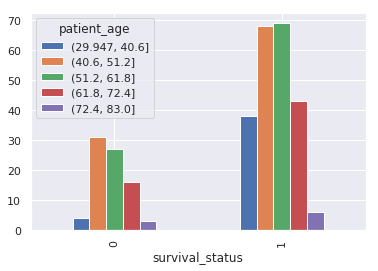

In [61]:
 age_survival_crosstab_view.plot(kind='bar');


# Patients with a greater number of positive axillary nodes survived less often. 

### Where the number of nodes was <10.4, there were more survivors. 


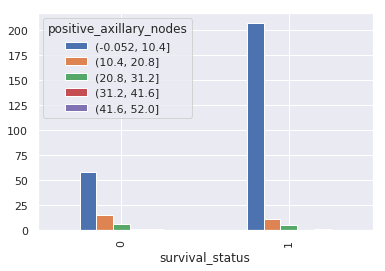

In [62]:
nodes_survival_crosstab_view.plot(kind='bar');

# How are these features related with each other?



*   Younger patients survived more often than older patients
*   Patients with a greater number of positive axillary nodes survived less often



Here is the age distribution:

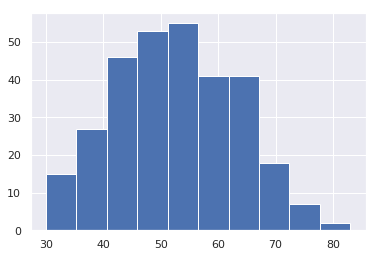

In [69]:
plt.hist(df['patient_age']);

Clearly, those from 65-80 were underrepresented in this dataset (last three bars).

In this dataset, younger people tended to have more positive axillary nodes than older people. However, we found that more positive axillary nodes meant that the patient was less likely to survivee and younger people were more likely to survive. This is a contradiction.

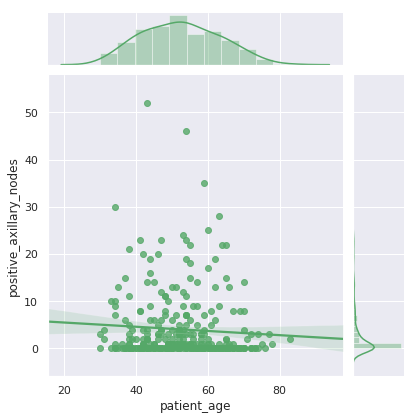

In [70]:
plot = sns.jointplot(data=df, x='patient_age', y='positive_axillary_nodes', kind='reg', color='g');

## Without normalizing for age, it is difficult to see how these to variables relate. The underrepresented age groups make it difficult to objectively view the data.

This is likely the cause of the contradiction.